Aluno: Wallace Ketler Melo de Morais

<h1>Tarefas a serem feitas</h1>

1-Definir o conjunto de dados<br>
2-Definir as funções de pertinencia<br>
3-Calcular o grau de ativação dos antecedentes (W) (Grau de ativação das funções de pertinencia)<br>
4-Calcular a saida de cada regra (minimo) (antecedente -> consequente)<br>
5-Agregar as saidas das regras (maximo)<br>
6-Defuzificar - saida com valor númerico<br>

Fazer as etapas 3 a 6 para cada um dos pontos

Inicialmente, devemos instalar a biblioteca skfuzzy para que possamos fazer a defuzzificação:
<hr>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<hr>
Depois disso, foram incluídas as bibliotecas que serão usadas, sendo elas a <strong>matplotlib</strong> para que possamos plotar gráficos, a <strong>skfuzzy</strong> para a defuzzificação pelo método máximo dos máximos e, por fim, a <strong>numpy</strong> para que possamos trabalhar com espaços lineares em Python. Além disso, definimos a  função de pertinência trapezoidal, de modo que possamos utilizar os dados passados em aula.
<hr>

In [ ]:
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import numpy as np

def trapezoidal(x,a,m,n,b):
    return max(min((x-a)/(m-a),1,(b-x)/(b-n)),0)

<hr>
Para que possamos plotar os gráficos das funções de pertinência e da defuzzificação ao final, devemos declarar dois espaços lineares de tamanho 100, de modo que o primeiro vai de -10 até 10 e o segundo vai de 0 até 10. Depois disso, definimos o antecedente que usará o primeiro espaço linear e o consequente que usará o segundo espaço linear.
<hr>

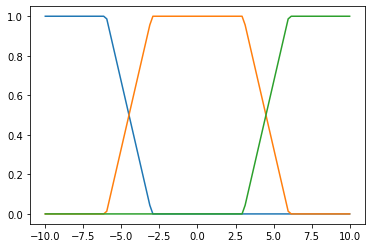

In [ ]:
tamanho = 100

x_tam = np.linspace(-10,10,tamanho)
y_tam = np.linspace(0,10,tamanho)

#cria funções de entrada

y1_entrada = []
y2_entrada = []
y3_entrada = []
for i in range(tamanho):

  y1_entrada.append(trapezoidal(x_tam[i],-20,-15,-6,-3))
  y2_entrada.append(trapezoidal(x_tam[i],-6,-3,3,6))
  y3_entrada.append(trapezoidal(x_tam[i],3,6,15,20))

plt.plot(x_tam,y1_entrada)
plt.plot(x_tam,y2_entrada)
plt.plot(x_tam,y3_entrada)
plt.show()


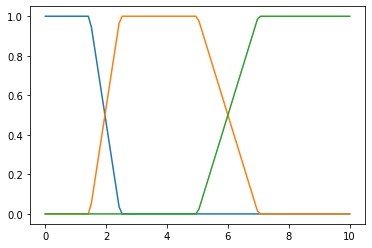

In [ ]:
#cria funções de saída

y1_saida = []
y2_saida = []
y3_saida = []
for i in range(tamanho):
  y1_saida.append(trapezoidal(y_tam[i],-2.46,-1.46,1.46,2.46))
  y2_saida.append(trapezoidal(y_tam[i],1.46,2.46,5,7))
  y3_saida.append(trapezoidal(y_tam[i],5,7,13,15))

plt.plot(y_tam,y1_saida)
plt.plot(y_tam,y2_saida)
plt.plot(y_tam,y3_saida)
plt.show()



<hr>
# As regras são: <br>
Se y_entrada é a1 -> y_saida é c3 <br>
Se y_entrada é a2 -> y_saida é c2 <br>
Se y_entrada é a3 -> y_saida é c1 <br>

<hr>
Por fim, devemos calcular o mínimo entre o antecedente e o consequente, de modo que, para cada entrada, devemos comparar com todas saídas. Depois disso, devemos associar tais saídas com a função máximo. Finalmente, devemos defuzzificar o sistema:

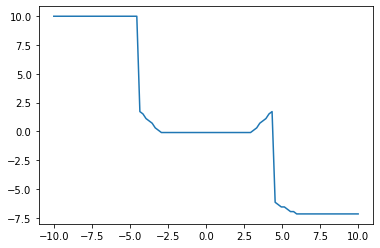

In [ ]:
#calcula a saída de cada regra

defuzzy = []

for i in range(tamanho):
  c1 = []
  c2 = []
  c3 = []
  ymax = []
  for j in range(tamanho):
    c1.append(min(y3_saida[j],y1_entrada[i]))
    c2.append(min(y2_saida[j],y2_entrada[i]))
    c3.append(min(y1_saida[j],y3_entrada[i])) 
    ymax.append(max(c1[j],c2[j],c3[j]))
  defuzzy.append(fuzz.defuzz(np.array(x_tam), np.array(ymax), 'lom'))
plt.plot(x_tam, defuzzy)
plt.show()

